In [2]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/kr/2019_up3/2019_up3_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/kr/2019_up3/2019_up3_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/kr/2019_up3/2019_up3_(KR)BlockMedia.csv', error_bad_lines=False))


In [3]:
data.loc[data['main article']=="Provided by Coinness",'main article'] = data.loc[data['main article']=="Provided by Coinness",'abstract']
data.loc[data['main article']=="Provided by 코인니스",'main article'] = data.loc[data['main article']=="Provided by 코인니스",'abstract']
# data.loc[data['main article']=='Provided by 코인니스','abstract']

In [4]:
text = data[['main article']].astype(str)

text.loc[text['main article']=="Provided by Coinness"]



,main article


In [5]:
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)

In [6]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [7]:
text['main article']

0    \n\n\n\n\n사진=연합뉴스\n\n                        가...
0    암호화폐 전문 미디어 크립토글로브에 따르면, 세계적인 보안 소프트웨어 개발자이자 비...
1    암호화폐 전문 미디어 데일리호들에 따르면, 펀드스트랫 공동 창업자이자 수석 애널리스...
2    암호화폐 전문 미디어 비트코이니스트에 따르면 미국 암호화폐 전문 투자운용사 갤럭시디...
3    Provided by 코인니스. <저작권자 © TokenPost, 무단전재 및 재배...
0    25일(현지시간) 코인텔레그래프에 따르면, 비트코인은 장중 약 5분 동안 7855달...
1    크립토글로브 등 언론들은 이날 중국 신화통신을 인용, 시진핑 주석이 전일 중국은 블...
2    (거래량 기준 거래소 상위 Top5, 자료 = 코인마켓캡)오전 8시 40분 기준으로...
3    현지 시각 10월 25일 외신 코인텔레그래프 보도에 따르면, 뉴욕대 교수이자 월가 ...
4    25일 대통력직속 4차산업혁명위원회는 ‘4차 산업혁명 대정부 권고안’을 발표했다. ...
Name: main article, dtype: object

In [8]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [9]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [10]:
text['pos tag']

0    [(사진, NNG), (=, SY), (연합뉴스, NNP), (가, JKS), (상...
0    [(암호, NNG), (화폐, NNG), (전문, NNG), (미디어, NNG), ...
1    [(암호, NNG), (화폐, NNG), (전문, NNG), (미디어, NNG), ...
2    [(암호, NNG), (화폐, NNG), (전문, NNG), (미디어, NNG), ...
3    [(Provided, SL), (by, SL), (코인, NNG), (니스, NNG...
0    [(25, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간...
1    [(크, IC), (립, NNG), (토글, NNG), (로브, NNG), (등, ...
2    [((, SSO), (거래량, NNG), (기준, NNG), (거래소, NNG), ...
3    [(현지, NNG), (시각, NNG), (10, SN), (월, NNBC), (2...
4    [(25, SN), (일, NNBC), (대통력, NNG), (직속, NNG), (...
Name: pos tag, dtype: object

In [11]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC')])

In [12]:
text['main article']

0    [사진, =, 연합뉴스, 상, 화폐, (, 암호, 화폐, ), 비트코인, 시세, 하...
0    [암호, 화폐, 전문, 미디어, 크, 립, 토글, 로브, 따르, ,, 세계, 적, ...
1    [암호, 화폐, 전문, 미디어, 데일, 리호, 들, 따르, ,, 펀드, 스, 트, ...
2    [암호, 화폐, 전문, 미디어, 비트, 코이, 니스트, 따르, 미국, 암호, 화폐,...
3    [Provided, by, 코인, 니스, ., <, 저작권자, ©, TokenPos...
0    [일, (, 현지, 시간, ), 코인, 텔레, 그래프, 따르, ,, 비트코인, 장중...
1    [크, 립, 토글, 로브, 등, 언론, 들, 이날, 중국, 신화, 통신, 인용, ,...
2    [(, 거래량, 기준, 거래소, 상위, Top, ,, 자료, =, 코인, 마켓, 캡...
3    [현지, 시각, 월, 일, 외신, 코인, 텔레, 그래프, 보도, 따르, ,, 뉴욕,...
4    [일, 대통력, 직속, 차, 산업, 혁명, 위원회, ‘, 차, 산업, 혁명, 대, ...
Name: main article, dtype: object

In [13]:
import csv
stopword_list =[]
f = open('../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [14]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0    [사진, 연합뉴스, 화폐, 암호, 화폐, 비트코인, 시세, 하루, 급등, 넘겼, 암...
0    [암호, 화폐, 전문, 미디어, 토글, 로브, 세계, 보안, 소프트웨어, 개발자, ...
1    [암호, 화폐, 전문, 미디어, 데일, 리호, 펀드, 공동, 창업자, 수석, 애널리...
2    [암호, 화폐, 전문, 미디어, 비트, 코이, 니스트, 미국, 암호, 화폐, 전문,...
3    [Provided, 코인, 니스, 저작권자, TokenPost, 무단, 전재, 배포...
0    [현지, 시간, 코인, 텔레, 그래프, 비트코인, 장중, 동안, 달러, 달러, 시간...
1    [토글, 로브, 언론, 이날, 중국, 신화, 통신, 인용, 시진핑, 주석, 전일, ...
2    [거래량, 기준, 거래소, 상위, Top, 자료, 코인, 마켓, 오전, 기준, 시간...
3    [현지, 시각, 외신, 코인, 텔레, 그래프, 보도, 뉴욕, 교수, 월가, 투자, ...
4    [대통력, 직속, 산업, 혁명, 위원회, 산업, 혁명, 정부, 고안, 발표, 산업,...
Name: main article, dtype: object


In [15]:
article_contents = tokenized_doc.values.tolist()

In [16]:
len(tokenized_doc)

10

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
# article_contents_tfidf

In [21]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [22]:
word2id = defaultdict(lambda: 0)

In [23]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [24]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [25]:
len(tf_idf_result)

578

In [26]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

578


In [27]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [28]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.004*"그래프" + 0.004*"Nicholas" + 0.004*"집계" + 0.004*"시각" + 0.004*"BitForex" + 0.004*"탈레브" + 0.004*"정식" + 0.004*"포지션"')
(1, '0.004*"Salim" + 0.004*"전화" + 0.004*"다면서" + 0.004*"고객" + 0.004*"백트" + 0.004*"보인다고" + 0.004*"거래량" + 0.004*"eToro"')
(2, '0.005*"코인" + 0.005*"가장" + 0.005*"Top" + 0.005*"텔레" + 0.005*"당시" + 0.005*"LBank" + 0.005*"약간" + 0.005*"외신"')
(3, '0.004*"채무" + 0.004*"사나" + 0.004*"진행" + 0.004*"페턴" + 0.004*"급등세" + 0.004*"마티" + 0.004*"선임" + 0.004*"기회"')


In [29]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [30]:
sentences = article_contents

In [31]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

1161

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

578

In [35]:
# model.wv.vocab

In [36]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [37]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [38]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [39]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [40]:
temp_cluster_result['cluster'] = assigned_clusters

In [41]:
temp_cluster_result['raw_data'] = X.tolist()

In [42]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [43]:
from sklearn.metrics import pairwise_distances

In [44]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [45]:
len(cosine_centroid_list)

578

In [46]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [47]:
sum(temp_distance[3])

567.4646149636898

In [48]:
import scipy.spatial.distance as dist

In [49]:
dist.cosine(X[0],cosine_centroid_list[0])

0.7483199534790276

In [50]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.02913977810269591

In [51]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [52]:
len(tf_idf_value)

578

In [53]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [54]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
544,"[-0.0032764673233032227, -0.000466400291770696...",보완,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.608477,0.012191,1.596286,NaN
255,"[-0.0028454831335693598, 0.0008779739728197455...",시간,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.788915,0.182859,1.606057,NaN
136,"[-0.0021312958560884, -0.0009963850025087595, ...",전문,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.720197,0.109715,1.610481,NaN
111,"[0.0001210826521855779, 0.00488348538056016, 0...",거래량,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.848394,0.231621,1.616773,NaN
343,"[0.0006458064308390021, -0.0041725486516952515...",아래,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.630686,0.012191,1.618495,NaN
424,"[-0.000471777020720765, 0.0008439436787739396,...",개인,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.641356,0.012191,1.629165,NaN
206,"[-0.0016294451197609305, -0.004298046231269836...",로브,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.657253,0.024381,1.632871,NaN
157,"[-0.004846915137022734, -0.0017305307555943727...",반론,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.666796,0.012191,1.654606,NaN
18,"[-0.001953804399818182, -0.0029121616389602423...",적극,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.729782,0.060953,1.668829,NaN
496,"[-0.0035363249480724335, 0.0011416854104027152...",정의,0,"[-0.0008071324, -0.00028736793, 0.0006035832, ...",0.699060,0.012191,1.686870,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
468,"[0.00019314717792440206, 0.0037041502073407173...",직속,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.521090,0.012191,1.508899,NaN
153,"[0.0011462346883490682, 0.0036249884869903326,...",육성,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.696501,0.109715,1.586786,NaN
2,"[-0.004837896674871445, -0.004398034419864416,...",화폐,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.919794,0.316955,1.602838,NaN
17,"[0.0014913013437762856, -0.0037798131816089153...",산업,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.825449,0.207240,1.618208,NaN
127,"[0.0005921913543716073, 0.0017407756531611085,...",사이버,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.673379,0.036572,1.636808,NaN
13,"[0.0004352601245045662, 0.002212101360782981, ...",중국,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.873387,0.207240,1.666147,NaN
137,"[-0.0025154463946819305, -0.000624997890554368...",코인,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.788712,0.121906,1.666806,NaN
262,"[0.0038053628522902727, 0.00013806337665300816...",기준,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.720035,0.048762,1.671272,NaN
144,"[0.004846077878028154, -0.00019559162319637835...",퍼블릭,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.690678,0.012191,1.678488,NaN
94,"[0.00041426141979172826, -0.00319139682687819,...",뉴욕,1,"[-0.000114651855, 0.0007054222, 0.00012473228,...",0.739841,0.060953,1.678889,NaN


In [56]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[0.0011545622255653143, 0.004301154054701328, ...",암호,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.817358,0.365718,1.451640,NaN
4,"[0.0019649479072541, 0.0009867362678050995, -0...",비트코인,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.672477,0.219431,1.453047,NaN
194,"[-0.0030654901638627052, -0.004520258400589228...",라고,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.572946,0.024381,1.548565,NaN
176,"[0.0003823360020760447, 0.0025289023760706186,...",은행,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.684073,0.109715,1.574357,NaN
38,"[-0.00207187095656991, 0.0010402820771560073, ...",기술,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.731271,0.121906,1.609365,NaN
138,"[-0.0001814496936276555, -0.003669351106509566...",텔레,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.688414,0.060953,1.627461,NaN
271,"[0.002733501372858882, 0.0037485044449567795, ...",급증,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.649232,0.012191,1.637041,NaN
28,"[0.00014243373880162835, -0.001239973935298621...",현재,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.701031,0.060953,1.640078,NaN
518,"[-0.0046825287863612175, 0.004538415465503931,...",국제,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.691416,0.036572,1.654844,NaN
428,"[0.0037801649887114763, -0.0042984988540410995...",중지,2,"[-1.7647044e-05, 5.4350083e-05, -0.00018755144...",0.674563,0.012191,1.662372,NaN


In [57]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 반정부

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
21,"[0.003161521628499031, -0.002786921104416251, ...",의사,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.429864,0.012191,1.417674,NaN
16,"[-0.0012730223825201392, 0.0009263993706554174...",블록체인,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.834202,0.292574,1.541628,NaN
14,"[-0.0030870891641825438, -0.004646736662834883...",국가,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.662412,0.060953,1.601459,NaN
373,"[-0.0020168398041278124, 0.0043959468603134155...",글로벌,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.616720,0.012191,1.604530,NaN
340,"[-0.0007542168023064733, -0.004210338462144136...",경고,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.641177,0.012191,1.628986,NaN
268,"[-0.00372232124209404, -0.000565988477319479, ...",분석가,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.699208,0.048762,1.650445,NaN
502,"[0.0002446468570269644, -0.004111335147172213,...",인력,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.691085,0.024381,1.666704,NaN
101,"[0.0030567499343305826, -0.0020915751811116934...",체인지,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.681871,0.012191,1.669681,NaN
99,"[-0.004586178809404373, 0.0001596565853105858,...",콘티넨탈,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.699019,0.012191,1.686828,NaN
47,"[0.0022205922286957502, -0.0021593293640762568...",블록,3,"[0.00040704815, 8.25997e-05, -0.00018064819, -...",0.774635,0.085334,1.689301,NaN


In [58]:
y_km = temp_cluster_result['cluster'].values

In [59]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

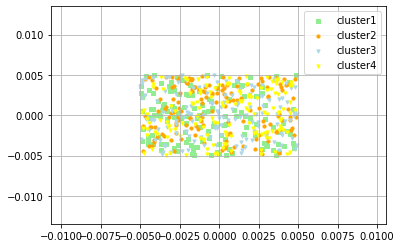

In [60]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소

143

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 제도

154

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 투자

140

In [64]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 반정부

141

In [65]:
temp_cluster_result['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [66]:
temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 10 #  제도

In [69]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 11 #  투자

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 3 # 반사회운동 

In [71]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [73]:
kmeans.inertia_

0.4674586465354135

In [74]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 1 0 2 2 3 3 3 1 3 2 3 3 0 1 0 0 1 3 1 3 1 1 1 3 1 1 1 2 1 3 3 1 2 2 2 3
 0 2 0 2 0 3 3 3 3 3 1 3 3 0 0 3 0 2 3 3 3 1 1 2 3 0 1 3 2 1 1 2 1 3 3 3 1
 3 1 1 1 2 3 1 3 1 3 1 1 3 3 0 0 0 3 3 2 0 3 1 1 3 2 3 2 3 3 2 2 2 1 1 0 3
 2 0 3 2 3 3 0 2 0 3 3 0 3 2 3 3 1 3 3 2 0 3 0 0 3 3 2 0 0 3 1 1 3 3 3 2 2
 3 2 0 1 2 2 3 0 0 3 2 3 1 3 0 2 2 3 1 2 3 3 2 1 0 1 1 3 2 1 2 3 2 3 3 2 2
 0 1 1 0 1 1 1 3 3 2 2 1 1 1 1 1 1 1 3 1 0 3 2 0 3 0 1 1 2 3 0 1 3 2 1 1 0
 3 1 2 0 3 3 3 1 1 3 3 0 3 1 1 0 0 3 2 3 1 3 0 3 2 0 1 3 2 0 1 3 1 0 0 0 1
 1 2 1 3 2 3 1 1 1 1 3 3 2 2 2 1 0 2 3 1 0 1 0 0 1 3 3 0 3 3 1 2 3 2 0 3 2
 1 2 2 3 3 2 1 1 2 3 3 0 1 2 2 3 3 1 3 2 0 3 3 3 3 0 2 0 0 3 3 1 1 3 2 1 3
 1 3 3 3 1 1 3 2 1 1 3 3 3 3 3 0 3 3 2 1 3 3 3 3 3 0 3 3 1 0 3 0 3 3 2 1 3
 1 2 3 2 3 3 3 3 1 0 3 3 2 1 2 1 0 2 0 1 0 3 1 0 2 2 1 3 3 3 0 3 1 3 1 1 3
 3 3 1 1 2 2 3 2 1 0 1 0 1 3 0 1 3 3 1 3 1 2 2 1 3 3 1 3 1 2 3 1 3 3 3 1 1
 2 0 3 2 1 3 1 3 0 3 0 2 2 1 1 2 1 0 1 3 3 0 1 2 1 2 3 3 0 2 2 3

In [75]:
cluster_values= list(model.wv.vocab)

In [76]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.46745867


In [77]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [78]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.010884832


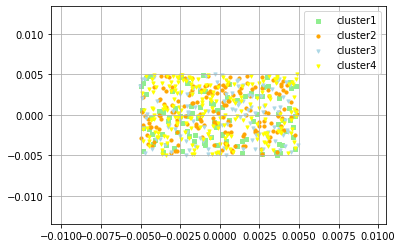

In [79]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [80]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [81]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [82]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [83]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [84]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [85]:
import scipy.spatial.distance as dist

In [86]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [87]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[-0.004837896674871445, -0.004398034419864416,...",화폐,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.029715,0.316955,0.712760,NaN
16,"[-0.0012730223825201392, 0.0009263993706554174...",블록체인,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.028831,0.292574,0.736256,NaN
13,"[0.0004352601245045662, 0.002212101360782981, ...",중국,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.030422,0.207240,0.823182,NaN
255,"[-0.0028454831335693598, 0.0008779739728197455...",시간,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.027538,0.182859,0.844679,NaN
39,"[0.00013226298324298114, -0.002408068161457777...",개발,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.026016,0.097525,0.928492,NaN
15,"[-0.0005557866534218192, -0.002671750960871577...",주석,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.028458,0.097525,0.930933,NaN
50,"[-0.0028752838261425495, -0.004064015112817287...",디지털,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.028076,0.060953,0.967123,NaN
138,"[-0.0001814496936276555, -0.003669351106509566...",텔레,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.028124,0.060953,0.967171,NaN
90,"[0.004422204568982124, 0.004067901987582445, 0...",정책,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.029724,0.060953,0.968771,NaN
94,"[0.00041426141979172826, -0.00319139682687819,...",뉴욕,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.030698,0.060953,0.969745,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
17,"[0.0014913013437762856, -0.0037798131816089153...",산업,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.028783,0.207240,0.821543,NaN
258,"[-0.0028925270307809114, 0.0003504688793327659...",달러,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.026291,0.109715,0.916576,NaN
47,"[0.0022205922286957502, -0.0021593293640762568...",블록,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.025208,0.085334,0.939874,NaN
58,"[-0.0014804670354351401, -0.001378028420731425...",자산,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.028181,0.085334,0.942847,NaN
202,"[-0.001172331627458334, -0.0007079563802108169...",자료,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.028951,0.073144,0.955808,NaN
173,"[-0.0026358789764344692, -0.003670511301606893...",관련,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.029241,0.073144,0.956097,NaN
75,"[-0.0038392834831029177, -2.287268580403179e-0...",보도,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.029877,0.073144,0.956734,NaN
14,"[-0.0030870891641825438, -0.004646736662834883...",국가,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.027113,0.060953,0.966160,NaN
204,"[-0.0028365752659738064, -0.004441330209374428...",미디어,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.028687,0.060953,0.967734,NaN
22,"[-0.0022051529958844185, -0.000185660741408355...",밝혔,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.029636,0.060953,0.968683,NaN


In [90]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 비즈시도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[0.0011545622255653143, 0.004301154054701328, ...",암호,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.028007,0.365718,0.662290,NaN
111,"[0.0001210826521855779, 0.00488348538056016, 0...",거래량,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.027642,0.231621,0.796020,NaN
4,"[0.0019649479072541, 0.0009867362678050995, -0...",비트코인,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.029006,0.219431,0.809576,NaN
137,"[-0.0025154463946819305, -0.000624997890554368...",코인,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.028265,0.121906,0.906359,NaN
38,"[-0.00207187095656991, 0.0010402820771560073, ...",기술,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.028847,0.121906,0.906941,NaN
153,"[0.0011462346883490682, 0.0036249884869903326,...",육성,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.028396,0.109715,0.918681,NaN
176,"[0.0003823360020760447, 0.0025289023760706186,...",은행,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.029294,0.109715,0.919579,NaN
65,"[-0.0032806103117763996, -0.001491043251007795...",세계,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.027809,0.097525,0.930284,NaN
469,"[-0.0042554945684969425, -0.004161564633250236...",혁명,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.027997,0.085334,0.942663,NaN
395,"[-0.0008970532799139619, 0.00485372357070446, ...",레바논,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.028781,0.085334,0.943447,NaN


In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 사회이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9,"[-0.0025426531210541725, 0.000920019403565675,...",거래소,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.030308,0.121906,0.908403,NaN
136,"[-0.0021312958560884, -0.0009963850025087595, ...",전문,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.029126,0.109715,0.919411,NaN
381,"[0.0031324708834290504, 0.0047704316675662994,...",비중,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.027936,0.085334,0.942601,NaN
45,"[0.004800586961209774, 0.0003719025116879493, ...",이날,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.028059,0.073144,0.954916,NaN
115,"[-0.001230417750775814, -0.0015017041005194187...",시장,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.028138,0.073144,0.954994,NaN
48,"[-0.001761718071065843, 0.004312443546950817, ...",체인,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.028189,0.073144,0.955045,NaN
74,"[-0.0010467574466019869, -0.002935848198831081...",해야,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.028452,0.073144,0.955308,NaN
103,"[0.004581502638757229, -0.0017752894200384617,...",정부,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.030109,0.073144,0.956966,NaN
7,"[-0.004667568486183882, 0.004858044441789389, ...",급등,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.030247,0.073144,0.957103,NaN
121,"[-0.0026175728999078274, 0.004068442620337009,...",발언,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.027817,0.060953,0.966864,NaN


In [96]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #비즈

98

In [97]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #투자

164

In [98]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #비즈

112

In [99]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #이슈

204

In [100]:
temp_cluster_result1['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈 

In [102]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 11 # 투자

In [103]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈 

In [104]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 이슈  

In [105]:
temp_cluster_result1

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#,category,label
0,"[0.004531229846179485, 0.003325082827359438, 0...",사진,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.029451,0.012191,1.017261,NaN,2,7.0
1,"[-0.004584782756865025, -0.0024991491809487343...",연합뉴스,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.028719,0.012191,1.016528,NaN,2,11.0
2,"[-0.004837896674871445, -0.004398034419864416,...",화폐,0,"[-0.00025384006, -0.00042506866, -0.0005736653...",0.029715,0.316955,0.712760,NaN,2,7.0
3,"[0.0011545622255653143, 0.004301154054701328, ...",암호,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.028007,0.365718,0.662290,NaN,2,7.0
4,"[0.0019649479072541, 0.0009867362678050995, -0...",비트코인,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.029006,0.219431,0.809576,NaN,2,7.0
...,...,...,...,...,...,...,...,...,...,...
573,"[0.00390609516762197, -0.0018509484361857176, ...",http,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.028822,0.024381,1.004441,NaN,2,11.0
574,"[0.0021297165658324957, -0.0015599355101585388...",bitly,2,"[0.00030022784, -9.3166134e-05, -0.00038424798...",0.027990,0.024381,1.003609,NaN,2,7.0
575,"[0.0036004353314638138, 0.004587988369166851, ...",VH,3,"[-0.0003698347, 0.00039517364, 0.0005261903, -...",0.027293,0.012191,1.015102,NaN,2,5.0
576,"[0.0024623877834528685, -0.0008804312674328685...",그램,1,"[-6.985388e-05, 0.0003553222, 0.0002786875, 0....",0.027632,0.012191,1.015441,NaN,2,11.0


In [106]:
temp_cluster_result1['Silhouette'] = 0.010884832
temp_cluster_result['Silhouette'] = 0.010884832

In [107]:
#temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")

In [108]:
len(temp_cluster_result1)

578

In [109]:
len(temp_cluster_result)

578

In [110]:
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [111]:
temp_cluster_result1.to_csv("../cluster/ko_news/2019_up3/ko_news_2019_up3_euclidean.csv")
temp_cluster_result.to_csv("../cluster/ko_news/2019_up3/ko_news_2019_up3_cosine.csv")